In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


In [2]:
# reading dataset

df = pd.read_csv('/home/pedro/bkp/code/dataset/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")

# Hospitalized people with age small than 110:

df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
print(df.shape)

/home/pedro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-e4702e7af6cc>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-2-e4702e7af6cc>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-2-e4702e7af6cc>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCA

(242679, 154)


In [3]:
# Pre-processing time variable

df['time'] = pd.to_datetime(df['DT_ENCERRA'], format='%d/%m/%Y',errors ='coerce').subtract(pd.to_datetime(df['DT_SIN_PRI'], format='%d/%m/%Y', errors ='coerce'))
df['time'] = df['time']/ np.timedelta64(1, 'D')


In [4]:
# Private and public hospital separation

df_hospital = pd.read_csv('/home/pedro/bkp/code/dataset/CNES_SUS.txt', sep='\t')


public   =  set(df_hospital.iloc[:,0][df_hospital.iloc[:,3]=='S'])
private  =  set(df_hospital.iloc[:,0][df_hospital.iloc[:,3]=='N'])


df.loc[df['CO_UNI_NOT'].isin(public) == True, 'HEALTH_SYSTEM'] = 1
df.loc[df['CO_UNI_NOT'].isin(private) == True, 'HEALTH_SYSTEM'] = 0



In [5]:
# IDHM

# Reading IBGE code for each municipalities and separating it for IDHM index

df_atlas = pd.read_excel (r'/home/pedro/bkp/code/dataset/AtlasBrasil_Consulta.xlsx')


# removind last interger in 'code' variable

df_atlas['code'] = df_atlas['code'].astype(str).str[:-1].astype(np.int64)


# Divinding IDHM in bins

IDHM_veryhigh  =  set(df_atlas['code'][df_atlas['IDHM2010']>=0.800])
print(len(IDHM_veryhigh))


IDHM_high  =  set(df_atlas['code'][((df_atlas['IDHM2010']>=0.700)&(df_atlas['IDHM2010']<0.800))])
print(len(IDHM_high))


IDHM_medium  =  set(df_atlas['code'][((df_atlas['IDHM2010']>=0.600)&(df_atlas['IDHM2010']<0.700))])
print(len(IDHM_medium))


IDHM_low  =  set(df_atlas['code'][((df_atlas['IDHM2010']>=0.500)&(df_atlas['IDHM2010']<0.600))])
print(len(IDHM_low))


IDHM_verylow  =  set(df_atlas['code'][df_atlas['IDHM2010']<0.500])
print(len(IDHM_verylow))




df.loc[df['CO_MUN_NOT'].isin(IDHM_veryhigh) == True, 'IDHM'] = 5
df.loc[df['CO_MUN_NOT'].isin(IDHM_high) == True, 'IDHM'] = 4
df.loc[df['CO_MUN_NOT'].isin(IDHM_medium) == True, 'IDHM'] = 3
df.loc[df['CO_MUN_NOT'].isin(IDHM_low) == True, 'IDHM'] = 2
df.loc[df['CO_MUN_NOT'].isin(IDHM_verylow) == True, 'IDHM'] = 1


44
1890
2233
1367
32


In [6]:
# Constraint on dataset: We only analyze people with evolution, IDHM and Health system outcomes

df = df[df['IDHM'].notnull()][(df['HEALTH_SYSTEM']==1)|(df['HEALTH_SYSTEM']==0)]
print(df.shape)

<ipython-input-6-8f4afe5f8a91>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['IDHM'].notnull()][(df['HEALTH_SYSTEM']==1)|(df['HEALTH_SYSTEM']==0)]


(231112, 157)


In [7]:
# Selecting people from North with COVID-19
df_N = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]\
[(df['SG_UF_NOT']=='RO')|(df['SG_UF_NOT']=='TO')|(df['SG_UF_NOT']=='AM')|(df['SG_UF_NOT']=='RR')\
|(df['SG_UF_NOT']=='AC')|(df['SG_UF_NOT']=='PA')|(df['SG_UF_NOT']=='AP')]


# Selecting people from Northeast with COVID-19
df_NE = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]\
[(df['SG_UF_NOT']=='RN')|(df['SG_UF_NOT']=='PE')|(df['SG_UF_NOT']=='SE')| (df['SG_UF_NOT']=='CE')\
|(df['SG_UF_NOT']=='PB')| (df['SG_UF_NOT']=='BA')|(df['SG_UF_NOT']=='AL')| (df['SG_UF_NOT']=='PI')\
|(df['SG_UF_NOT']=='MA')]


# Selecting people from Center-West with COVID-19
df_CO = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]\
[(df['SG_UF_NOT']=='DF')|(df['SG_UF_NOT']=='MS')|(df['SG_UF_NOT']=='GO')| (df['SG_UF_NOT']=='MT')]


# Selecting people from Southest with COVID-19
df_SE = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]\
[(df['SG_UF_NOT']=='SP') | (df['SG_UF_NOT']=='RJ')|(df['SG_UF_NOT']=='ES')|(df['SG_UF_NOT']=='MG')]


# Selecting people from South with COVID-19
df_S = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]\
[(df['SG_UF_NOT']=='RS')|(df['SG_UF_NOT']=='SC')|(df['SG_UF_NOT']=='PR')]


print('confirmed data in North :',df_N.shape[0])
print('confirmed data in Northeast:',df_NE.shape[0])
print('confirmed data in Center-West:',df_CO.shape[0])
print('confirmed data in Southest:',df_SE.shape[0])
print('confirmed data in South:',df_S.shape[0])

confirmed data in North : 12166
confirmed data in Northeast: 42251
confirmed data in Center-West: 18601
confirmed data in Southest: 129347
confirmed data in South: 28747


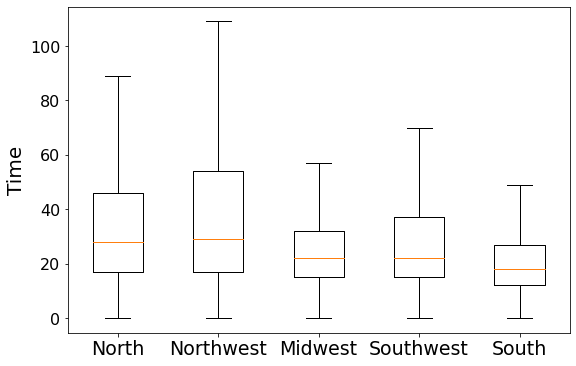

In [8]:

labels = ['North', 'Northwest', 'Midwest', 'Southwest', 'South']


fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)


all_data = [df_N['time'].dropna(), df_NE['time'].dropna(),\
df_CO['time'].dropna(),df_SE['time'].dropna(),\
df_S['time'].dropna()]



# Create the boxplot
bp = ax.boxplot(all_data , showfliers=False, labels=labels, sym='k+')


ax.set_xticklabels(labels=labels,fontsize=19)
plt.yticks(fontsize=16)
plt.setp(bp['fliers'], markersize=3.0)
plt.ylabel('Time',fontsize=20)
plt.savefig('boxplot_time.pdf')
plt.show()
plt.close()